In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore")

# Load Data

In [4]:
df = pd.read_excel('../data/Online-Retail.xlsx')
df.to_csv('../data/Online-retail.csv', index=False)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Check Data

In [6]:
print("Number of Columns in the Data: ", df.shape[1])
print("Number of Rows in the Data: ", df.shape[0])

Number of Columns in the Data:  8
Number of Rows in the Data:  541909


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.duplicated().sum()

5268

# EDA

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


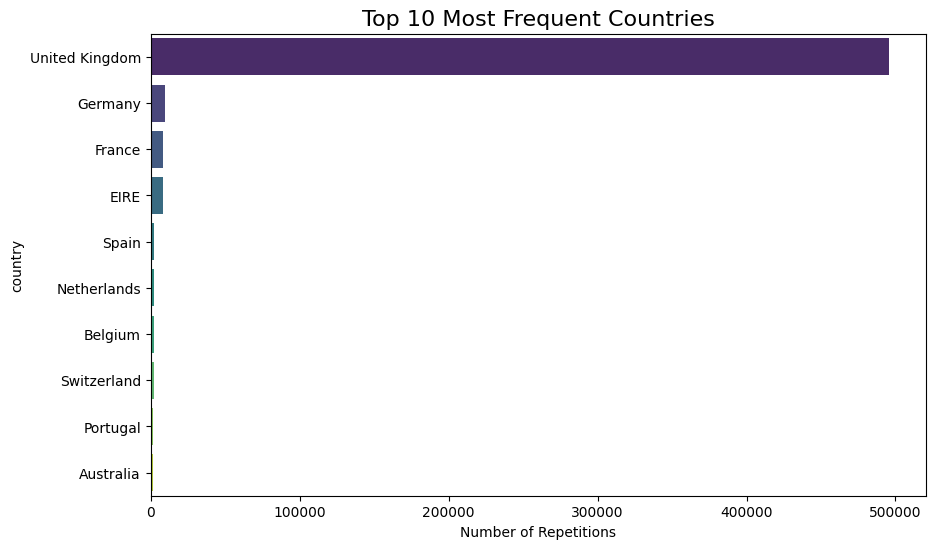

In [11]:
country_count = df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index, palette='viridis')
plt.title("Top 10 Most Frequent Countries", fontsize=16)
plt.xlabel("Number of Repetitions")
plt.ylabel("country")
plt.show()


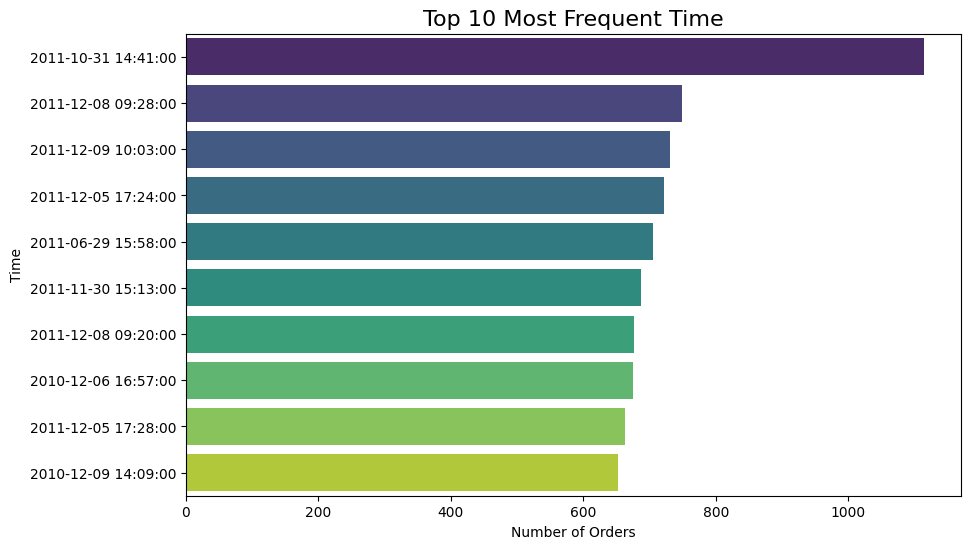

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d.%f')
time_triend = df['InvoiceDate'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=time_triend.values, y=time_triend.index, palette='viridis')
plt.title('Top 10 Most Frequent Time', fontsize=16)
plt.xlabel('Number of Orders')
plt.ylabel('Time')
plt.show()


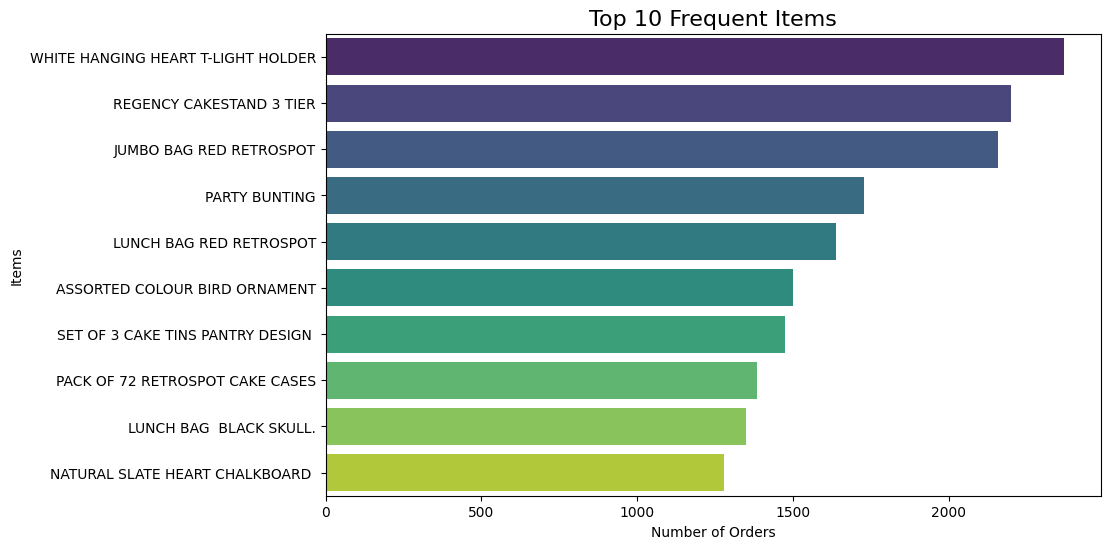

In [13]:
description_count = df["Description"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=description_count.values, y=description_count.index, palette='viridis')
plt.title("Top 10 Frequent Items", fontsize=16)
plt.xlabel("Number of Orders")
plt.ylabel("Items")
plt.show()


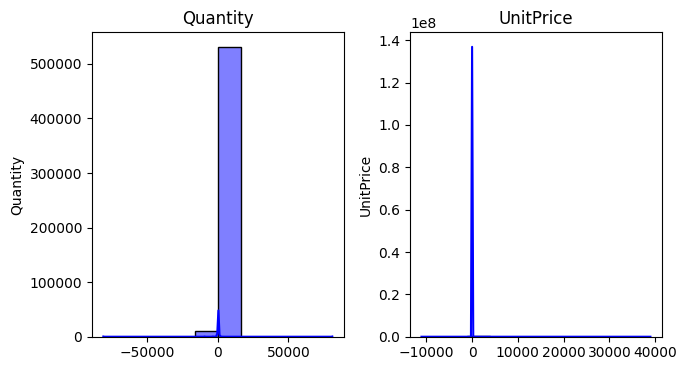

In [14]:
number_columns_plot = [
    'Quantity',
    'UnitPrice',
]

plt.figure(figsize=(10, 4))
for i , feature in enumerate(number_columns_plot):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=df[feature], bins=10, kde=True, color='blue')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()


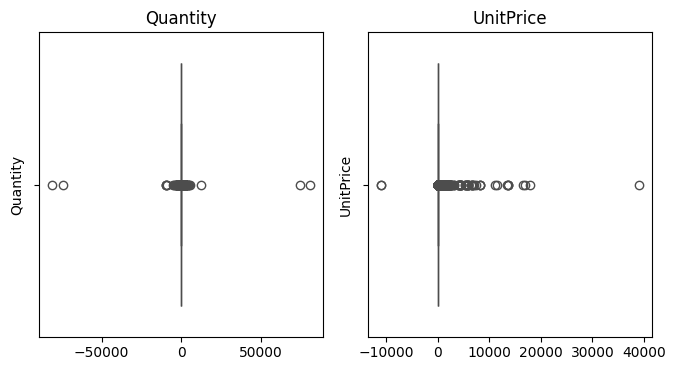

In [15]:
plt.figure(figsize=(10, 4))
for i, feature in enumerate(number_columns_plot):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x=df[feature], color='red')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(f'{feature}')
plt.tight_layout()


# Cleaning

## Duplicated Value

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

## There is no country called israel

In [18]:
df["Country"] = df["Country"].str.replace("Israel", "Palestine")

## Outliers

In [19]:
def remove_outliers_iqr(dataframe, column, lower_quantile=0.25, upper_quantile=0.75):
    q1 = dataframe[column].quantile(lower_quantile)
    q3 = dataframe[column].quantile(upper_quantile)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return dataframe[(dataframe[column] > lower_bound) & (dataframe[column] < upper_bound)]

In [20]:
df = remove_outliers_iqr(df, "Quantity", 0.30, 0.70)

In [21]:
df = remove_outliers_iqr(df, "UnitPrice", 0.25, 0.65)

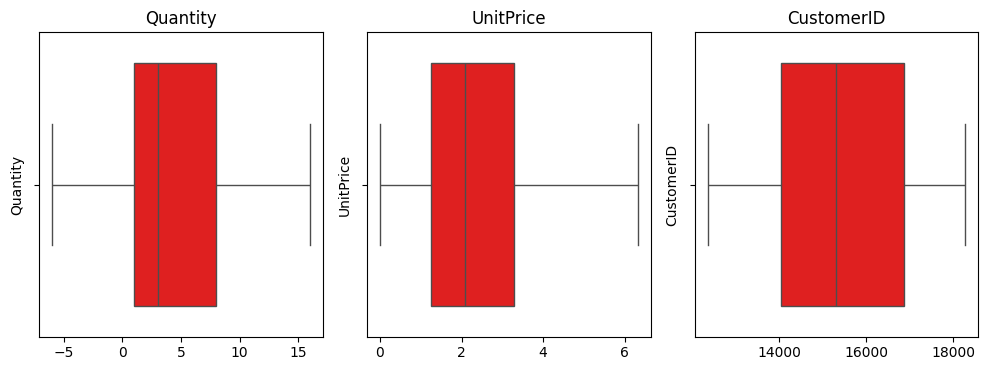

In [22]:
plt.figure(figsize=(10, 4))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x=df[feature], color='red')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(f'{feature}')
plt.tight_layout()


## Encoding

In [23]:
X = df[["Quantity", "UnitPrice", "Country"]]
encoder = LabelEncoder()

X["Country"] = encoder.fit_transform(X["Country"])

## Missing Values

In [24]:
X.dropna(inplace=True)

In [25]:
X.isnull().sum()

Quantity     0
UnitPrice    0
Country      0
dtype: int64

# Feature Engineering

In [26]:
X["total_price"] = X["Quantity"] * X["UnitPrice"]
X

,Quantity,UnitPrice,Country,total_price
0,6,2.55,36,15.30
1,6,3.39,36,20.34
2,8,2.75,36,22.00
3,6,3.39,36,20.34
4,6,3.39,36,20.34
...,...,...,...,...
541904,12,0.85,13,10.20
541905,6,2.10,13,12.60
541906,4,4.15,13,16.60
541907,4,4.15,13,16.60


# Correlation Matrix

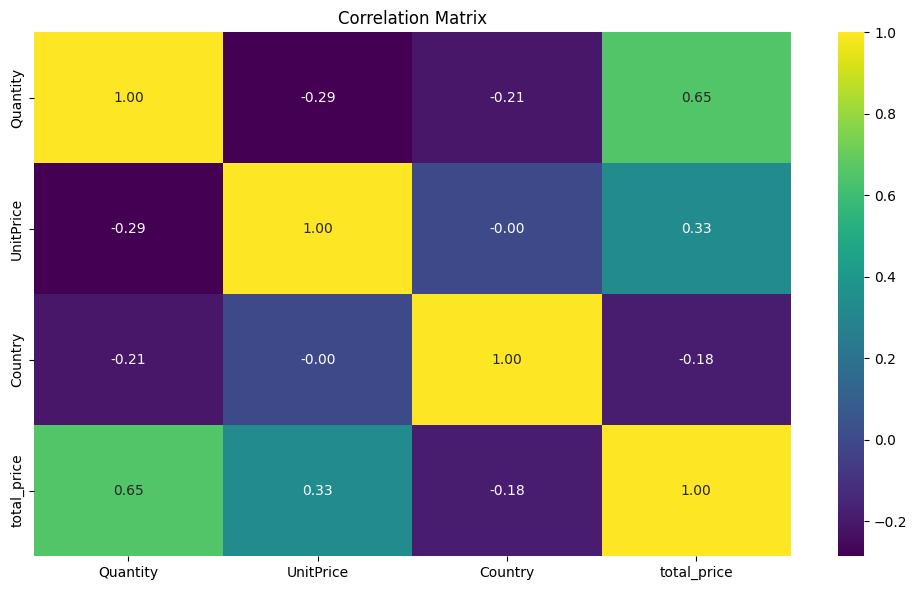

In [27]:
corr = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Scaling

In [29]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Modeling

In [ ]:
from sklearn.cluster import KMeans

In [34]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

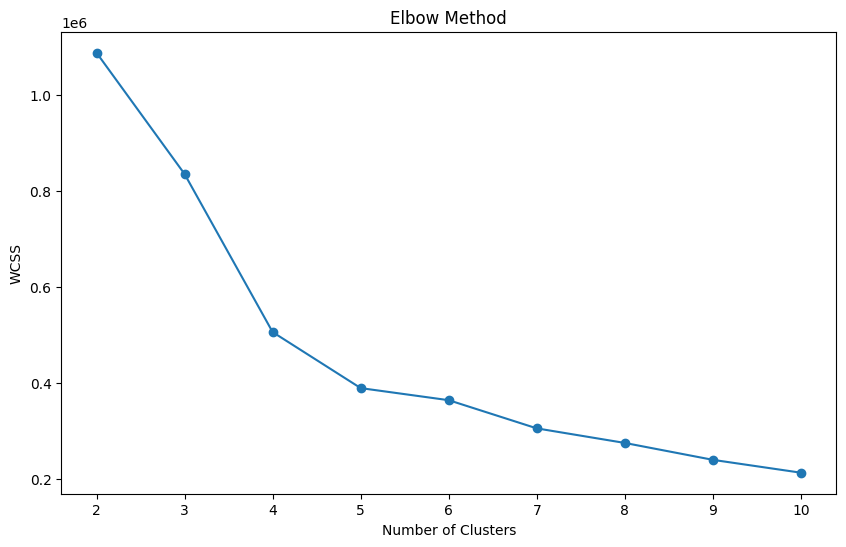

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

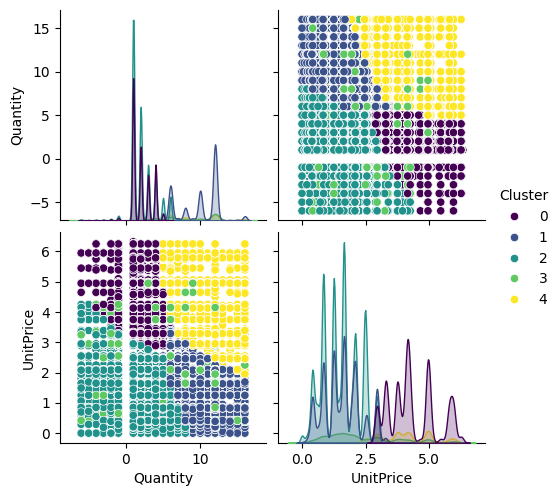

In [37]:
sns.pairplot(df, hue='Cluster', vars=['Quantity', 'UnitPrice',], palette='viridis')
plt.show()

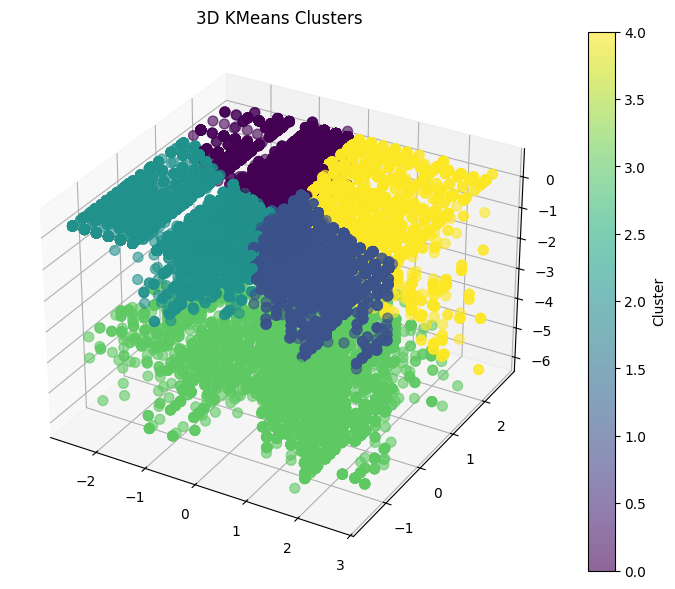

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Make sure X has 3 columns (features) for 3D plotting
X_3d = X[:, :3]  # Select the first 3 features for 3D plotting

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
scatter = ax.scatter(
    X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
    c=df['Cluster'], cmap='viridis', s=50, alpha=0.6
)

ax.set_title('3D KMeans Clusters')

plt.colorbar(scatter, label='Cluster')
plt.show()
